# Time Series
    Zaman serisi verileri, finans, ekonomi, ekoloji, sinirbilim ve fizik gibi birçok farklı alanda önemli bir yapılandırılmış veri biçimidir. Zamanın birçok noktasında gözlemlenen veya ölçülen her şey bir zaman serisi oluşturur. Çoğu zaman serisi sabit frekanstır, yani veri noktalarının her 15 saniyede bir, her 5 dakikada bir veya ayda bir gibi bazı kurallara göre düzenli aralıklarla meydana geldiği anlamına gelir. Zaman serileri, sabit bir zaman birimi veya birimler arasında fark olmaksızın da düzensiz olabilir. Zaman serisi verilerini nasıl işaretlediğiniz ve bunlara atıfta bulunduğunuz uygulamaya bağlıdır ve aşağıdakilerden birine sahip olabilirsiniz:
    • Zaman damgaları, zamandaki belirli anlar
    • Ocak 2007 veya 2010 yılının tamamı gibi sabit dönemler
    • Başlangıç ve bitiş zaman damgası ile gösterilen zaman aralıkları. Dönemler, özel aralık durumları olarak düşünülebilir
    • Deney veya geçen süre; her zaman damgası, belirli bir başlangıç zamanına göre bir zaman ölçüsüdür (örneğin, fırına yerleştirildikten sonra her saniye pişen bir kurabiyenin çapı)

    Pandas, birçok yerleşik zaman serisi aracı ve veri algoritması sağlar. Çok büyük zaman serileriyle verimli bir şekilde çalışabilir ve düzensiz ve sabit frekanslı zaman serilerini kolayca dilimleyebilir ve parçalara ayırabilir, bir araya getirebilir ve yeniden örnekleyebilirsiniz. Bu araçlardan bazıları özellikle finans ve ekonomi uygulamaları için kullanışlıdır, ancak bunları kesinlikle sunucu günlüğü verilerini analiz etmek için de kullanabilirsiniz.

# 11.1 Date and Time Data Types and Tools
    Python standart kitaplığı, tarih ve saat verileri için veri türlerinin yanı sıra takvimle ilgili işlevselliği içerir. Tarih saat, saat ve takvim modülleri, başlanacak ana yerlerdir. Datetime.datetime türü veya kısaca datetime türü yaygın olarak kullanılır.

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2020, 12, 8, 22, 1, 12, 953932)

In [4]:
now.year, now.month, now.day

(2020, 12, 8)

    datetime hem tarihi hem de saati mikrosaniyeye kadar saklar. timedelta, iki datetime nesnesi arasındaki zamansal farkı temsil eder.

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [6]:
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

    Bir datetime nesnesine bir timedelta veya birden fazla ekleyebilir (veya çıkartabilirsiniz).

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

    Tablo 11-1, datetime modülündeki veri türlerini özetlemektedir.

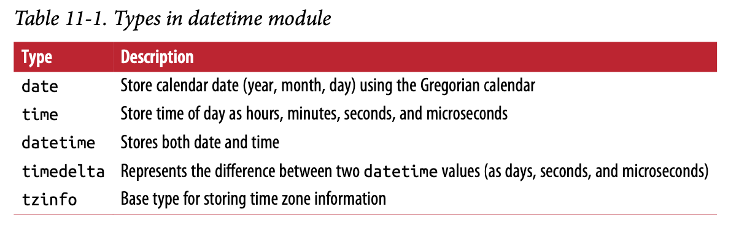

In [13]:
from IPython.display import Image
Image("img/picture76.png")

# Dize ve Tarih Saat Arasında Dönüştürme
    Daha sonra tanıtacağım datetime nesnelerini ve pandas Timestamp nesnelerini, bir biçim belirtimini ileterek str veya strftime yöntemini kullanarak dizeler olarak biçimlendirebilirsiniz.

In [14]:
stamp = datetime(2011, 1, 3)

In [15]:
str(stamp)

'2011-01-03 00:00:00'

In [16]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

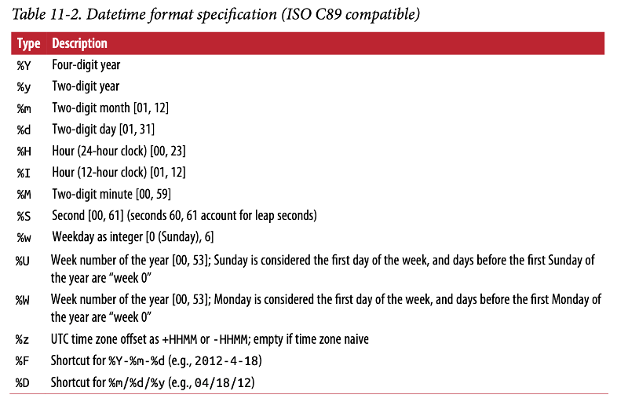

In [17]:
Image("img/picture77.png")

    Date time.strptime kullanarak dizeleri tarihlere dönüştürmek için aynı biçim kodlarını kullanabilirsiniz.

In [18]:
value = '2011-01-03'

In [19]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
datestrs = ['7/6/2011', '8/6/2011']

In [21]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

    datetime.strptime, bilinen bir biçime sahip bir tarihi ayrıştırmanın iyi bir yoludur. Ancak, özellikle yaygın tarih formatları için her seferinde bir format spesifikasyonu yazmak zorunda kalmak biraz can sıkıcı olabilir. Bu durumda, üçüncü taraf dateutil paketindeki parser.parse yöntemini kullanabilirsiniz.

In [22]:
from dateutil.parser import parse

In [23]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

    dateutil, insan tarafından anlaşılır tarih temsillerinin çoğunu ayrıştırabilir.

In [24]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

    Uluslararası yerel ayarlarda, aydan önce görünen gün çok yaygındır, bu nedenle bunu belirtmek için dayfirst = True seçeneğini geçebilirsiniz.

In [25]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

    Pandalar genellikle, ister eksen dizini olarak ister bir DataFrame'de bir sütun olarak kullanılsın, tarih dizileriyle çalışmaya yöneliktir. To_datetime yöntemi birçok farklı tarih temsilini ayrıştırır. ISO 8601 gibi standart tarih biçimleri çok hızlı bir şekilde ayrıştırılabilir.

In [26]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [27]:
import pandas as pd
import numpy as np
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

    Eksik olarak kabul edilmesi gereken değerleri de işler.

In [28]:
idx = pd.to_datetime(datestrs + [None])

In [29]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [30]:
idx[2]

NaT

In [31]:
pd.isnull(idx)

array([False, False,  True])

    datetime nesneleri ayrıca diğer ülkelerdeki veya dillerdeki sistemler için bir dizi yerel ayara özgü biçimlendirme seçeneğine sahiptir. Örneğin, kısaltılmış ay adları İngilizce sistemlere kıyasla Almanca veya Fransızca sistemlerde farklı olacaktır. Liste için Tablo 11-3'e bakın.

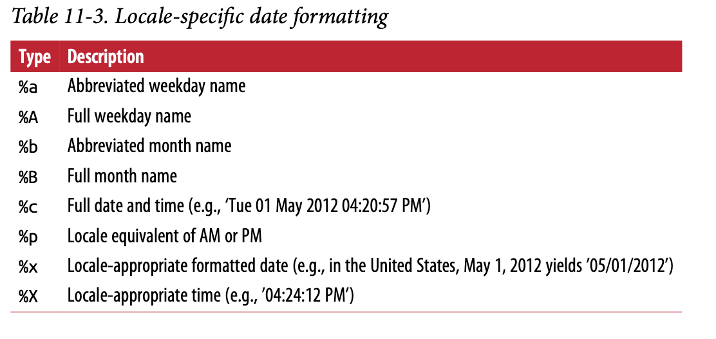

In [32]:
Image("img/picture78.png")

# 11.2 Zaman Serisi Temelleri
    Pandas temel bir tür zaman serisi nesnesi, zaman damgaları tarafından indekslenen ve genellikle pandaların dışında Python dizeleri veya datetime nesneleri olarak temsil edilen bir Seridir.

In [33]:
from datetime import datetime

In [34]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [35]:
ts = pd.Series(np.random.randn(6), index=dates)

In [36]:
ts

2011-01-02   -0.167618
2011-01-05   -0.139078
2011-01-07   -0.955696
2011-01-08   -0.830644
2011-01-10   -1.236246
2011-01-12   -0.726282
dtype: float64

    Başlık altında, bu datetime nesneleri bir DatetimeIndex değerine yerleştirilmiştir.

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

    Diğer Seriler gibi, farklı şekilde indekslenmiş zaman serileri arasındaki aritmetik işlemler tarihlere otomatik olarak hizalanır.

In [38]:
ts + ts[::2]

2011-01-02   -0.335236
2011-01-05         NaN
2011-01-07   -1.911393
2011-01-08         NaN
2011-01-10   -2.472491
2011-01-12         NaN
dtype: float64

    Ts [:: 2] 'nin ts cinsinden her ikinci elemanı seçtiğini hatırlayın.

    Pandas, Nanosaniyede NumPy’nin datetime64 veri türünü kullanarak zaman damgalarını depolar
    çözüm:

In [39]:
ts.index.dtype

dtype('<M8[ns]')

    DatetimeIndex'teki skaler değerler pandaların Timestamp nesneleridir.

In [40]:
stamp = ts.index[0]

In [41]:
stamp

Timestamp('2011-01-02 00:00:00')

    Bir Zaman Damgası, datetime nesnesini kullanacağınız herhangi bir yerde değiştirilebilir. Ek olarak, frekans bilgilerini (varsa) depolayabilir ve saat dilimi dönüşümlerinin ve diğer türden işlemlerin nasıl yapılacağını anlar.

# İndeksleme, Seçim, Alt Kümeleme

In [42]:
stamp = ts.index[2]

In [43]:
ts[stamp]

-0.9556964358265075

    Kolaylık sağlamak için, tarih olarak yorumlanabilen bir dize de iletebilirsiniz.

In [44]:
ts['1/10/2011']

-1.2362455523428892

In [45]:
ts['20110110']

-1.2362455523428892

    Daha uzun zaman serileri için, veri dilimlerini kolayca seçmek için bir yıl veya yalnızca bir yıl ve ay geçilebilir.

In [46]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [47]:
longer_ts

2000-01-01    0.591602
2000-01-02    0.048478
2000-01-03   -1.819338
2000-01-04    0.790559
2000-01-05    0.446850
                ...   
2002-09-22   -0.827081
2002-09-23   -0.647824
2002-09-24    0.107585
2002-09-25   -1.903806
2002-09-26   -0.152246
Freq: D, Length: 1000, dtype: float64

In [48]:
longer_ts['2001']

2001-01-01    0.451057
2001-01-02   -1.051888
2001-01-03   -0.077032
2001-01-04    0.957333
2001-01-05   -0.800397
                ...   
2001-12-27    1.436362
2001-12-28   -0.758598
2001-12-29   -1.679734
2001-12-30   -0.396577
2001-12-31    0.308144
Freq: D, Length: 365, dtype: float64

    Burada, '2001' dizisi bir yıl olarak yorumlanır ve bu zaman periyodunu seçer. Bu, ayı belirtirseniz de işe yarar.

In [49]:
longer_ts['2001-05']

2001-05-01    2.069407
2001-05-02    0.474534
2001-05-03   -0.498526
2001-05-04    1.394368
2001-05-05   -1.533434
2001-05-06   -0.429792
2001-05-07    1.430014
2001-05-08   -0.674394
2001-05-09    0.132574
2001-05-10   -0.519418
2001-05-11    1.503926
2001-05-12    1.604574
2001-05-13   -0.158515
2001-05-14    0.035668
2001-05-15   -0.327299
2001-05-16    1.115009
2001-05-17   -0.305507
2001-05-18   -0.662547
2001-05-19   -0.261305
2001-05-20    1.535290
2001-05-21    0.206806
2001-05-22   -0.312340
2001-05-23    0.237264
2001-05-24    0.966096
2001-05-25   -0.944367
2001-05-26    0.275228
2001-05-27    1.667173
2001-05-28    0.042950
2001-05-29   -0.293588
2001-05-30   -1.078286
2001-05-31   -0.427982
Freq: D, dtype: float64

    Datetime nesneleriyle dilimleme de işe yarar.

In [50]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.955696
2011-01-08   -0.830644
2011-01-10   -1.236246
2011-01-12   -0.726282
dtype: float64

    Çoğu zaman serisi verisi kronolojik olarak sıralandığından, bir aralık sorgusu gerçekleştirmek için bir zaman serisinde yer almayan zaman damgalarıyla dilimleme yapabilirsiniz.

In [51]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.955696
2011-01-08   -0.830644
2011-01-10   -1.236246
dtype: float64

    Daha önce olduğu gibi, bir dize tarihi, tarih saati veya zaman damgası geçirebilirsiniz. Bu şekilde dilimlemenin, NumPy dizilerini dilimlemek gibi kaynak zaman serileri üzerinde görünümler oluşturduğunu unutmayın. Bu, hiçbir verinin kopyalanmayacağı ve dilim üzerindeki değişikliklerin orijinal verilere yansıtılacağı anlamına gelir.

    Bir Seriyi iki tarih arasında dilimleyen eşdeğer bir örnek yöntemi vardır: truncate:

In [52]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.167618
2011-01-05   -0.139078
2011-01-07   -0.955696
2011-01-08   -0.830644
dtype: float64

    Tüm bunlar DataFrame için de geçerlidir ve satırları üzerinde indeksleme yapar.

In [53]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [54]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

long_df.loc['5-2001']

# Yinelenen Endeksli Zaman Serileri
    Bazı uygulamalarda, belirli bir zaman damgasına düşen birden çok veri gözlemi olabilir. İşte bir örnek:

In [55]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [56]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [57]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

    İs_unique özelliğini kontrol ederek indeksin benzersiz olmadığını söyleyebiliriz.

In [58]:
dup_ts.index.is_unique

False

    Bu zaman serisine endeksleme, bir zaman damgasının yinelenip yinelenmediğine bağlı olarak artık ya skaler değerler ya da dilimler üretecektir.

In [59]:
dup_ts['1/3/2000'] # kopyalanmamış

4

In [60]:
dup_ts['1/2/2000'] # kopyalanmış

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

    Benzersiz olmayan zaman damgalarına sahip verileri toplamak istediğinizi varsayalım. Bunu yapmanın bir yolu groupby kullanmak ve pass level=0:

In [61]:
grouped = dup_ts.groupby(level=0)

In [62]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [63]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Tarih Aralıkları, Frekanslar ve Kaydırma
    Pandas jenerik zaman serilerinin düzensiz olduğu varsayılır; yani sabit bir frekansları yoktur. Birçok uygulama için bu yeterlidir. Bununla birlikte, bir zaman serisine eksik değerler eklemek anlamına gelse bile, genellikle günlük, aylık veya 15 dakikada bir gibi sabit bir sıklığa göre çalışmak istenir. Neyse ki pandalar, yeniden örnekleme, frekanslar çıkarma ve sabit frekanslı tarih aralıkları oluşturma için eksiksiz bir standart zaman serisi frekansları ve araçları paketine sahiptir. Örneğin, resample işlevini çağırarak örnek zaman serilerini sabit günlük sıklığa dönüştürebilirsiniz.

In [64]:
ts

2011-01-02   -0.167618
2011-01-05   -0.139078
2011-01-07   -0.955696
2011-01-08   -0.830644
2011-01-10   -1.236246
2011-01-12   -0.726282
dtype: float64

In [65]:
resampler = ts.resample('D')

    'D' dizisi günlük sıklık olarak yorumlanır.

# Tarih Aralıkları Oluşturma
    pandas.date_range, belirli bir frekansa göre belirtilen uzunlukta bir DatetimeIndex oluşturmaktan sorumludur.

In [66]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [67]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

    Varsayılan olarak tarih_aralığı, günlük zaman damgaları oluşturur. Yalnızca bir başlangıç veya bitiş tarihi geçerseniz, oluşturmak için birkaç dönem geçmeniz gerekir.

In [68]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

    Başlangıç ve bitiş tarihleri, oluşturulan tarih dizini için katı sınırlar tanımlar. Örneğin, her ayın son iş gününü içeren bir tarih endeksi istiyorsanız, 'BM' sıklığını (ayın iş sonu; Tablo 11-4'te daha eksiksiz frekanslar listesine bakın) ve yalnızca veya tarih aralığının içi dahil edilecektir.

In [70]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

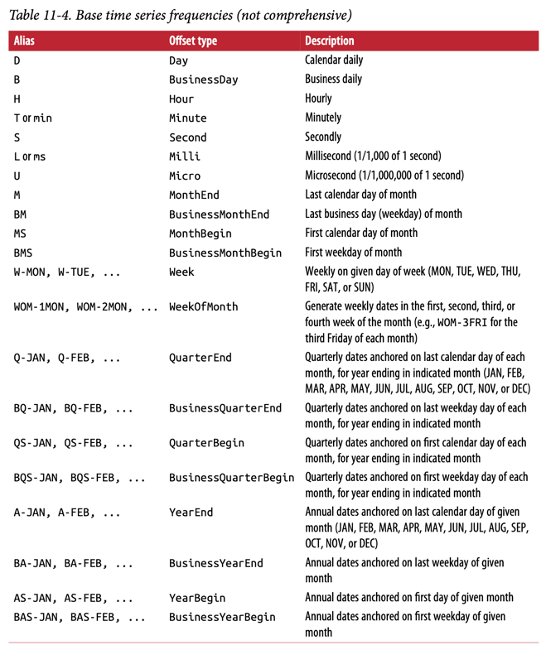

In [71]:
Image("img/picture79.png")

    date_range varsayılan olarak başlangıç veya bitiş zaman damgasının saatini (varsa) korur.

In [72]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

    Bazen saat bilgileriyle başlangıç veya bitiş tarihleriniz olur, ancak bir kural olarak gece yarısına normalleştirilmiş bir dizi zaman damgası oluşturmak isteyebilirsiniz. Bunu yapmak için bir normalleştirme seçeneği var.

In [73]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

# Frekanslar ve Tarih Farkları
    Pandalardaki frekanslar, bir temel frekans ve bir çarpandan oluşur. Temel frekanslar tipik olarak, aylık için 'M' veya saatlik için 'H' gibi bir dize takma adıyla belirtilir. Her temel frekans için, genellikle tarih ofseti olarak adlandırılan tanımlanmış bir nesne vardır. Örneğin, saatlik sıklık, Saat sınıfı ile temsil edilebilir.

In [74]:
from pandas.tseries.offsets import Hour, Minute

In [75]:
hour = Hour()

In [76]:
hour

<Hour>

    Bir tamsayı ileterek bir ofsetin katını tanımlayabilirsiniz.

In [77]:
four_hours = Hour(4)

In [78]:
four_hours

<4 * Hours>

    Çoğu uygulamada, 'H' veya '4H' gibi bir dize takma adı kullanmak yerine, bu nesnelerden birini açıkça oluşturmanız gerekmez. Temel frekanstan önce bir tamsayı koymak bir kat oluşturur.

In [79]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

    Birçok ofset ekleyerek birleştirilebilir.

In [80]:
Hour(2) + Minute(30)

<150 * Minutes>

    Benzer şekilde, etkin bir şekilde aynı ifadeye ayrıştırılacak "1s30dak" gibi frekans dizelerini iletebilirsiniz.

In [81]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

    Bazı frekanslar zaman içinde eşit aralıklı olmayan noktaları tanımlar. Örneğin, 'A' (takvim ayı sonu) ve 'BM' (son iş / ayın hafta içi günü) bir aydaki gün sayısına ve ikinci durumda ayın hafta sonunda bitip bitmediğine bağlıdır. Bunları bağlantılı ofsetler olarak adlandırıyoruz.

# Ayların haftası tarihleri
    Yararlı bir sıklık sınıfı, WOM ile başlayan "ayın haftası" dır. Bu, her ayın üçüncü Cuma günü gibi tarihler almanızı sağlar.

In [82]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [83]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

# Kaydırma (Öncü ve Gecikme) Verileri
    "Kaydırma", verilerin zaman içinde geriye ve ileriye taşınması anlamına gelir. Hem Series hem de DataFrame, ileriye veya geriye doğru saf geçişler yapmak için bir kaydırma yöntemine sahiptir ve dizini değiştirmeden bırakır.

In [84]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [85]:
ts

2000-01-31   -0.352418
2000-02-29    0.463366
2000-03-31   -0.398486
2000-04-30   -1.149113
Freq: M, dtype: float64

In [86]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.352418
2000-04-30    0.463366
Freq: M, dtype: float64

In [87]:
ts.shift(-2)

2000-01-31   -0.398486
2000-02-29   -1.149113
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

    Bu şekilde değiştiğimizde, eksik veriler zaman serisinin başında veya sonunda ortaya çıkar.

    Kaymanın yaygın bir kullanımı, DataFrame sütunları olarak bir zaman serisindeki veya çoklu zaman serilerindeki yüzde değişiklikleri hesaplamaktır. Bu şu şekilde ifade edilir:

In [88]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -2.314819
2000-03-31   -1.859981
2000-04-30    1.883698
Freq: M, dtype: float64

    Saf kaymalar indeksi değiştirmeden bıraktığı için bazı veriler atılır. Böylece, frekans biliniyorsa, basitçe veriler yerine zaman damgalarını ilerletmek için kaydırmaya geçilebilir.

In [89]:
ts.shift(2, freq='M')

2000-03-31   -0.352418
2000-04-30    0.463366
2000-05-31   -0.398486
2000-06-30   -1.149113
Freq: M, dtype: float64

In [90]:
ts.shift(3, freq='D')

2000-02-03   -0.352418
2000-03-03    0.463366
2000-04-03   -0.398486
2000-05-03   -1.149113
dtype: float64

In [91]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.352418
2000-02-29 01:30:00    0.463366
2000-03-31 01:30:00   -0.398486
2000-04-30 01:30:00   -1.149113
Freq: M, dtype: float64

    Kaydırma ile tarihleri değiştirme:

In [92]:
from pandas.tseries.offsets import Day, MonthEnd

In [93]:
now = datetime(2011, 11, 17)

In [94]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

    MonthEnd gibi bağlantılı bir ofset eklerseniz, ilk artış, sıklık kuralına göre bir tarihi sonraki tarihe "ileri alır".

In [95]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [96]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

    Bağlantılı uzaklıklar, sırasıyla geri alma ve geri alma yöntemlerini kullanarak tarihleri açıkça ileri veya geri "yuvarlayabilir".

In [97]:
offset = MonthEnd()

In [98]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [99]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

Timestamp('2011-10-31 00:00:00')

    Tarih ofsetlerinin bir kullanımı da, şu yöntemleri groupby ile kullanmaktır:

In [100]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [101]:
ts

2000-01-15   -0.333279
2000-01-19    2.311530
2000-01-23    0.182716
2000-01-27    1.192940
2000-01-31    1.753089
2000-02-04    1.421851
2000-02-08    0.268416
2000-02-12    0.588780
2000-02-16    1.817362
2000-02-20   -0.187322
2000-02-24   -0.319280
2000-02-28   -1.174072
2000-03-03   -0.489599
2000-03-07    1.427535
2000-03-11   -0.321368
2000-03-15   -1.005643
2000-03-19    0.191880
2000-03-23    0.386196
2000-03-27    0.694630
2000-03-31   -0.157693
Freq: 4D, dtype: float64

In [102]:
ts.groupby(offset.rollforward).mean()

2000-01-31    1.021399
2000-02-29    0.345105
2000-03-31    0.090742
dtype: float64

In [103]:
ts.resample('M').mean()

2000-01-31    1.021399
2000-02-29    0.345105
2000-03-31    0.090742
Freq: M, dtype: float64

# 11.4 Saat Dilimi İşleme
    Zaman dilimleriyle çalışmak, genellikle zaman serisi manipülasyonunun en rahatsız edici kısımlarından biri olarak kabul edilir. Sonuç olarak, birçok zaman serisi kullanıcısı, Greenwich Ortalama Zamanının halefi olan ve mevcut uluslararası standart olan eşgüdümlü evrensel saatte zaman serileriyle çalışmayı seçer. Saat dilimleri, UTC'den farklar olarak ifade edilir; örneğin, New York yaz saati uygulaması sırasında UTC'nin dört saat gerisinde ve yılın geri kalanında beş saat geridedir.

    Python'da, saat dilimi bilgileri, dünya saat dilimi bilgilerinin bir derlemesi olan Olson veritabanını ortaya çıkaran üçüncü taraf pytz kitaplığından (pip veya conda ile kurulabilir) gelir. Bu, özellikle tarihsel veriler için önemlidir, çünkü gün ışığından yararlanma saati (DST) geçiş tarihleri (ve hatta UTC farkları) yerel yönetimlerin kaprislerine bağlı olarak birçok kez değiştirilmiştir. Birleşik Devletler'de, DST geçiş süreleri 1900'den beri birçok kez değiştirildi!

    Pytz kitaplığı hakkında ayrıntılı bilgi için bu kitaplığın belgelerine bakmanız gerekir. Bu kitap söz konusu olduğunda, pandalar pytz'in işlevselliğini sarmalar, böylece saat dilimi adlarının dışındaki API'sini göz ardı edebilirsiniz. Saat dilimi adları etkileşimli olarak ve aşağıdaki belgelerde bulunabilir.

In [104]:
import pytz

In [105]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

    Pytz'den bir saat dilimi nesnesi almak için pytz.timezone kullanın.

In [106]:
tz = pytz.timezone('America/New_York')

In [107]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

    Pandalar'daki yöntemler, saat dilimi adlarını veya bu nesneleri kabul eder.

# Saat Dilimi Yerelleştirme ve Dönüştürme
    Varsayılan olarak, pandas'daki zaman serileri yerel saat dilimidir. Örneğin, aşağıdaki zaman serilerini düşünün:

In [108]:
import pandas as pd
import numpy as np
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [109]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [110]:
ts

2012-03-09 09:30:00   -0.178143
2012-03-10 09:30:00   -0.857762
2012-03-11 09:30:00    0.779415
2012-03-12 09:30:00   -0.083602
2012-03-13 09:30:00   -0.116134
2012-03-14 09:30:00    2.037980
Freq: D, dtype: float64

In [111]:
print(ts.index.tz)

None


    Tarih aralıkları, bir saat dilimi ayarıyla oluşturulabilir.

In [112]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [113]:
ts

2012-03-09 09:30:00   -0.178143
2012-03-10 09:30:00   -0.857762
2012-03-11 09:30:00    0.779415
2012-03-12 09:30:00   -0.083602
2012-03-13 09:30:00   -0.116134
2012-03-14 09:30:00    2.037980
Freq: D, dtype: float64

In [114]:
ts_utc = ts.tz_localize('UTC')

In [115]:
ts_utc

2012-03-09 09:30:00+00:00   -0.178143
2012-03-10 09:30:00+00:00   -0.857762
2012-03-11 09:30:00+00:00    0.779415
2012-03-12 09:30:00+00:00   -0.083602
2012-03-13 09:30:00+00:00   -0.116134
2012-03-14 09:30:00+00:00    2.037980
Freq: D, dtype: float64

In [116]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

    Bir zaman serisi belirli bir saat dilimine yerelleştirildiğinde, tz_convert ile başka bir saat dilimine dönüştürülebilir.

In [117]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.178143
2012-03-10 04:30:00-05:00   -0.857762
2012-03-11 05:30:00-04:00    0.779415
2012-03-12 05:30:00-04:00   -0.083602
2012-03-13 05:30:00-04:00   -0.116134
2012-03-14 05:30:00-04:00    2.037980
Freq: D, dtype: float64

    Amer ica / New_York saat diliminde bir DST geçişini destekleyen önceki zaman serileri durumunda, EST'ye yerelleştirebilir ve örneğin UTC veya Berlin saatine dönüştürebiliriz.

In [118]:
ts_eastern = ts.tz_localize('America/New_York')

In [119]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.178143
2012-03-10 14:30:00+00:00   -0.857762
2012-03-11 13:30:00+00:00    0.779415
2012-03-12 13:30:00+00:00   -0.083602
2012-03-13 13:30:00+00:00   -0.116134
2012-03-14 13:30:00+00:00    2.037980
Freq: D, dtype: float64

In [120]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.178143
2012-03-10 15:30:00+01:00   -0.857762
2012-03-11 14:30:00+01:00    0.779415
2012-03-12 14:30:00+01:00   -0.083602
2012-03-13 14:30:00+01:00   -0.116134
2012-03-14 14:30:00+01:00    2.037980
Freq: D, dtype: float64

    tz_localize ve tz_convert, DatetimeIndex'teki örnek yöntemleridir.

In [121]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

# Saat Dilimi ile İşlemler − Aware Zaman Damgası Nesneleri
    Zaman serileri ve tarih aralıklarına benzer şekilde, ayrı Zaman Damgası nesneleri de benzer şekilde basitten saat dilimine göre yerelleştirilebilir ve bir saat diliminden diğerine dönüştürülebilir.

In [122]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [123]:
stamp_utc = stamp.tz_localize('utc')

In [124]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

    Zaman Damgasını oluştururken de bir saat dilimi yazabilirsiniz.

In [125]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [126]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

    Saat dilimine duyarlı Timestamp nesneleri, Unix döneminden (1 Ocak 1970) bu yana bir UTC zaman damgası değerini dahili olarak nano saniye olarak depolar; bu UTC değeri, saat dilimi dönüşümleri arasında değişmez.

In [127]:
stamp_utc.value

1299902400000000000

In [128]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

    Pandas'ın DateOffset nesnelerini kullanarak zaman aritmetiği gerçekleştirirken, pandas mümkün olduğunda gün ışığından yararlanma saati geçişlerine uyar. Burada, DST geçişlerinden hemen önce (ileri ve geri) oluşan zaman damgaları oluşturuyoruz. İlk olarak, DST'ye geçmeden 30 dakika önce.

In [129]:
from pandas.tseries.offsets import Hour

In [130]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [131]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [132]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

    Ardından, DST'den çıkmadan 90 dakika önce:

In [133]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [134]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [135]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

# Farklı Saat Dilimleri Arasındaki İşlemler
    Farklı zaman dilimlerine sahip iki zaman serisi birleştirilirse, sonuç UTC olacaktır. Zaman damgaları UTC'de başlık altında saklandığından, bu basit bir işlemdir ve herhangi bir dönüşüm yapılmasını gerektirmez.

In [136]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [137]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [138]:
ts

2012-03-07 09:30:00   -0.078952
2012-03-08 09:30:00   -1.509267
2012-03-09 09:30:00    0.216251
2012-03-12 09:30:00    0.294584
2012-03-13 09:30:00    0.043956
2012-03-14 09:30:00    0.502256
2012-03-15 09:30:00   -0.252668
2012-03-16 09:30:00   -1.026749
2012-03-19 09:30:00   -0.549725
2012-03-20 09:30:00    0.037510
Freq: B, dtype: float64

In [139]:
ts1 = ts[:7].tz_localize('Europe/London')

In [140]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [141]:
result = ts1 + ts2

In [142]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 11.5 Periyotlar ve Periyot Aritmetiği
    Dönemler, günler, aylar, çeyrekler veya yıllar gibi zaman aralıklarını temsil eder. Period sınıfı, bir dize veya tamsayı ve Tablo 11-4'ten bir sıklık gerektiren bu veri türünü temsil eder.

In [143]:
p = pd.Period(2007, freq='A-DEC')

In [144]:
p

Period('2007', 'A-DEC')

    Bu durumda, Dönem nesnesi 1 Ocak 2007 ile 31 Aralık 2007 arasındaki tam zaman aralığını temsil eder. Elverişli bir şekilde, tam sayıları dönemlerden eklemek ve çıkarmak, sıklıklarına göre değişme etkisine sahiptir.

In [145]:
p+5

Period('2012', 'A-DEC')

In [146]:
p-2

Period('2005', 'A-DEC')

    İki dönemin aynı frekansı varsa, aralarındaki birim sayısı farkıdır.

In [147]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

    Düzenli dönem aralıkları, period_range işlevi ile oluşturulabilir.

In [148]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [149]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

    PeriodIndex sınıfı, bir dönem dizisini depolar ve herhangi bir pandas veri yapısında bir eksen dizini görevi görebilir.

In [150]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.856101
2000-02    0.818814
2000-03   -0.643821
2000-04    1.393822
2000-05    0.151194
2000-06    0.979933
Freq: M, dtype: float64

    Bir dizi dizeniz varsa, PeriodIndex sınıfını da kullanabilirsiniz.

In [151]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [152]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [153]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

# Periyot Frekans Dönüşümü
    Periyotlar ve PeriodIndex nesneleri asfreq yöntemi ile başka bir frekansa dönüştürülebilir. Örnek olarak, bir yıllık dönemimiz olduğunu ve bunu yılın başında veya sonunda aylık bir döneme dönüştürmek istediğimizi varsayalım.

In [154]:
p = pd.Period('2007', freq='A-DEC')

In [155]:
p

Period('2007', 'A-DEC')

In [156]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [157]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

    Dönemi ('2007', 'A-DEC') aylık dönemlere bölünmüş bir zaman aralığını gösteren bir tür imleç olarak düşünebilirsiniz. Bunun bir açıklaması için Şekil 11-1'e bakın. Aralık dışında bir ayda sona eren bir mali yıl için, karşılık gelen aylık alt dönemler farklıdır.

In [158]:
p = pd.Period('2007', freq='A-JUN')

In [159]:
p

Period('2007', 'A-JUN')

In [160]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [161]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

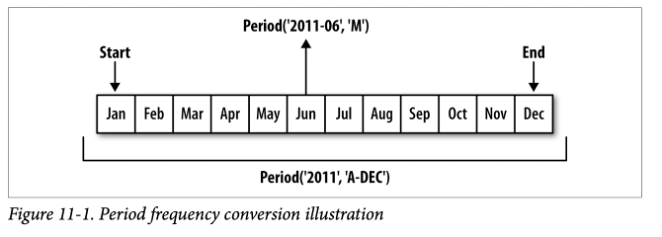

In [162]:
from IPython.display import Image
Image("img/picture80.png")

    Yüksek frekanstan düşük frekansa geçiş yaparken pandalar, alt periyodun “ait olduğu” yere bağlı olarak süper dönemi belirler. Örneğin, A-JUN sıklığında, Ağustos-2007 ayı aslında 2008 döneminin bir parçasıdır.

In [163]:
p = pd.Period('Aug-2007', 'M')

In [164]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

    Tüm PeriodIndex nesneleri veya zaman serileri, aynı semantiğe benzer şekilde dönüştürülebilir.

In [165]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [166]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [167]:
ts

2006    0.451662
2007    1.939921
2008    1.433454
2009    1.907176
Freq: A-DEC, dtype: float64

In [168]:
ts.asfreq('M', how='start')

2006-01    0.451662
2007-01    1.939921
2008-01    1.433454
2009-01    1.907176
Freq: M, dtype: float64

    Burada yıllık dönemler, her bir yıllık döneme giren ilk aya karşılık gelen aylık dönemlerle değiştirilir. Bunun yerine her yılın son iş gününü istersek, 'B' sıklığını kullanabilir ve dönemin sonunu istediğimizi belirtebiliriz.

In [169]:
ts.asfreq('B', how='end')

2006-12-29    0.451662
2007-12-31    1.939921
2008-12-31    1.433454
2009-12-31    1.907176
Freq: B, dtype: float64

# Üç Aylık Dönem Frekansları
    Üç aylık veriler muhasebe, finans ve diğer alanlarda standarttır. Çeyreklik verilerin çoğu, mali yıl sonuna göre rapor edilir, tipik olarak yılın 12 ayından birinin son takvimi veya iş günüdür. Dolayısıyla 2012Ç4 dönemi mali yıl sonuna bağlı olarak farklı bir anlama sahiptir. Pandalar, Q-JAN ile Q-DEC ile 12 olası üç aylık frekansı destekler.

In [170]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [171]:
p

Period('2012Q4', 'Q-JAN')

    2012 yılının Ocak ayında sona eren mali yıl durumunda, 4. Çeyrek Kasım'dan Ocak'a kadar devam eder ve bunu günlük sıklığa dönüştürerek kontrol edebilirsiniz. Bir gösterim için Şekil 11-2. ye bakın.

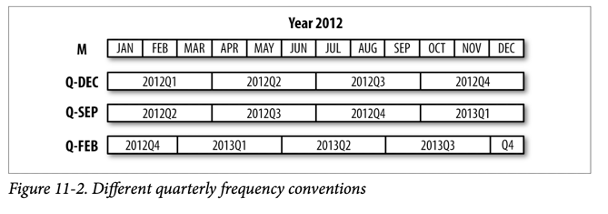

In [172]:
Image("img/picture81.png")

In [173]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [174]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

    Böylece, kolay dönem aritmetiği yapmak mümkündür; örneğin, çeyreğin ikinci ila son iş gününde saat 16: 00'da zaman damgası almak için şunları yapabilirsiniz:

In [175]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [176]:
p4pm

Period('2012-01-30 16:00', 'T')

In [177]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

    Period_range kullanarak üç aylık aralıklar oluşturabilirsiniz. Aritmetik de aynıdır.

In [178]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [179]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [180]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [181]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [182]:
ts.index = new_rng.to_timestamp()

# Zaman Damgalarını Dönemlere (ve Geri) Dönüştürme
    Zaman damgalarına göre indekslenen Series ve DataFrame nesneleri, to_period yöntemiyle dönemlere dönüştürülebilir.

In [183]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [184]:
ts = pd.Series(np.random.randn(3), index=rng)

In [185]:
ts

2000-01-31    0.921619
2000-02-29   -1.238203
2000-03-31    0.203244
Freq: M, dtype: float64

In [186]:
pts = ts.to_period()

In [187]:
pts

2000-01    0.921619
2000-02   -1.238203
2000-03    0.203244
Freq: M, dtype: float64

    Dönemler, çakışmayan zaman aralıklarına atıfta bulunduğundan, bir zaman damgası belirli bir sıklık için yalnızca tek bir döneme ait olabilir. Yeni PeriodIndex sıklığı varsayılan olarak zaman damgalarından çıkarılırken, istediğiniz herhangi bir sıklığı belirtebilirsiniz. Ayrıca sonuçta yinelenen dönemler olmasıyla ilgili bir sorun yoktur.

In [188]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [189]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [190]:
ts2

2000-01-29    1.420410
2000-01-30    0.007182
2000-01-31    0.197205
2000-02-01   -0.483437
2000-02-02   -0.384188
2000-02-03   -1.199151
Freq: D, dtype: float64

In [191]:
ts2.to_period('M')

2000-01    1.420410
2000-01    0.007182
2000-01    0.197205
2000-02   -0.483437
2000-02   -0.384188
2000-02   -1.199151
Freq: M, dtype: float64

    Zaman damgalarına geri dönmek için to_timestamp kullanın.

In [192]:
pts = ts2.to_period()

In [193]:
pts

2000-01-29    1.420410
2000-01-30    0.007182
2000-01-31    0.197205
2000-02-01   -0.483437
2000-02-02   -0.384188
2000-02-03   -1.199151
Freq: D, dtype: float64

In [194]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    1.420410
2000-01-30 23:59:59.999999999    0.007182
2000-01-31 23:59:59.999999999    0.197205
2000-02-01 23:59:59.999999999   -0.483437
2000-02-02 23:59:59.999999999   -0.384188
2000-02-03 23:59:59.999999999   -1.199151
Freq: D, dtype: float64

# Dizilerden PeriodIndex Oluşturma
    Sabit frekans veri kümeleri bazen birden çok sütuna yayılmış zaman aralığı bilgileriyle depolanır. Örneğin, bu makroekonomik veri setinde yıl ve üç aylık dönem farklı sütunlardadır.

In [195]:
data = pd.read_csv('examples/macrodata.csv')

In [196]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [197]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [198]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

    Bu dizileri PeriodIndex'e bir frekansla ileterek, DataFrame için bir dizin oluşturmak üzere bunları birleştirebilirsiniz.

In [199]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')

In [200]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [201]:
data.index = index

In [202]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 11.6 Yeniden Örnekleme ve Frekans Dönüştürme
    Yeniden örnekleme, bir zaman serisini bir frekanstan diğerine dönüştürme sürecini ifade eder. Daha yüksek frekanslı verilerin daha düşük frekansa toplanması alt örnekleme, düşük frekansın daha yüksek frekansa dönüştürülmesine yukarı örnekleme adı verilir. Tüm yeniden örnekleme bu kategorilerden hiçbirine girmez; örneğin, W-WED'i (Çarşamba günleri haftalık) W-FRI'ye dönüştürmek ne yukarı örnekleme ne de alt örneklemedir.

    Pandas nesneleri, tüm frekans dönüşümleri için en önemli işlev olan yeniden örnekleme yöntemiyle donatılmıştır. resample, groupby'ye benzer bir API'ye sahiptir; verileri gruplamak için yeniden örnekleme, ardından bir toplama fonksiyonu çağırırsınız.

In [203]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [204]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [205]:
ts

2000-01-01    2.219496
2000-01-02    1.333854
2000-01-03   -0.910499
2000-01-04    0.656197
2000-01-05   -0.047516
                ...   
2000-04-05    0.549141
2000-04-06    1.930335
2000-04-07   -0.517340
2000-04-08    1.738335
2000-04-09    0.412617
Freq: D, Length: 100, dtype: float64

In [206]:
ts.resample('M').mean()

2000-01-31   -0.026347
2000-02-29    0.303219
2000-03-31   -0.002111
2000-04-30    0.470735
Freq: M, dtype: float64

In [207]:
ts.resample('M', kind='period').mean()

2000-01   -0.026347
2000-02    0.303219
2000-03   -0.002111
2000-04    0.470735
Freq: M, dtype: float64

    resample, çok büyük zaman serilerini işlemek için kullanılabilen esnek ve yüksek performanslı bir yöntemdir. Aşağıdaki bölümlerdeki örnekler, anlamını ve kullanımını göstermektedir. Tablo 11-5, bazı seçeneklerini özetlemektedir.

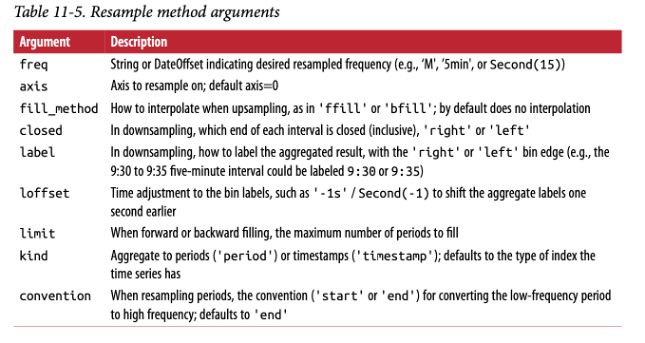

In [208]:
Image("img/picture82.png")

# Altörnekleme
    Verileri düzenli, daha düşük bir frekansta toplamak oldukça normal bir zaman serisi görevidir. Topladığınız verilerin sık sık düzeltilmesine gerek yoktur; istenen frekans, zaman serilerini kümelenmek üzere parçalara ayırmak için kullanılan bölme kenarlarını tanımlar. Örneğin, aylık "A" veya "BM" ye dönüştürmek için, verileri bir aylık aralıklara bölmeniz gerekir. Her aralığın yarı açık olduğu söylenir; bir veri noktası yalnızca bir aralığa ait olabilir ve aralıkların birleşimi tüm zaman çerçevesini oluşturmalıdır. Verileri alt örneklemek için yeniden örnekleme kullanırken düşünülmesi gereken birkaç nokta vardır.

    • Her aralığın hangi tarafı kapalıdır
    • Aralığın başlangıcı veya sonu ile birleştirilmiş her bölme nasıl etiketlenir

    Örnek olarak, bir dakikalık verilere bakalım.

In [209]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [210]:
ts = pd.Series(np.arange(12), index=rng)

In [211]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

    Her grubun toplamını alarak bu verileri beş dakikalık parçalar veya çubuklar halinde toplamak istediğinizi varsayalım.

In [212]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

    Geçtiğiniz frekans, bölme kenarlarını beş dakikalık artışlarla tanımlar. Varsayılan olarak, sol bölme kenarı kapsayıcıdır, bu nedenle 00:00 değeri 00:00 - 00:05 aralığına dahil edilir. 1 Passing closed='right' sağda kapatılacak aralığı değiştirir.

In [213]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

    Ortaya çıkan zaman serisi, her bölmenin sol tarafındaki zaman damgalarıyla etiketlenir. passing label='right', bunları sağ bölme kenarıyla etiketleyebilirsiniz.

In [214]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

    Beş dakikalık frekansa yeniden örneklenen dakika frekans verilerinin bir çizimi için Şekil 11-3'e bakın.

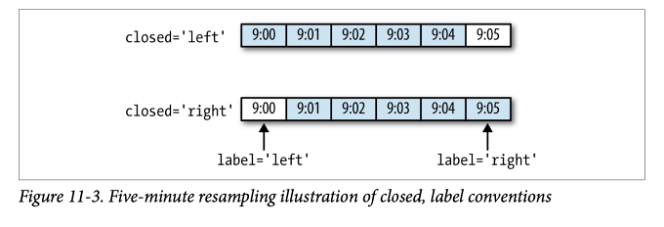

In [215]:
Image("img/picture83.png")

    Son olarak, sonuç indeksini bir miktar kaydırmak isteyebilirsiniz, örneğin, zaman damgasının hangi aralığa atıfta bulunduğunu daha net hale getirmek için sağ kenardan bir saniye çıkararak. Bunu yapmak için, loffset'e bir dize veya tarih ofseti yazın.

In [216]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

    Ayrıca, loffset'in etkisini, loffset olmadan sonuç üzerinde kaydırma yöntemini çağırarak da elde edebilirsiniz.

# Open-High-Low-Close (OHLC) yeniden örnekleme
    Finansta, bir zaman serisini toplamanın popüler bir yolu, her bölüm için dört değer hesaplamaktır: first (open), last (close), maximum (high), and minimal (low) değerler. Ohlc toplama işlevini kullanarak, bu dört kümeyi içeren sütunlara sahip bir DataFrame elde edersiniz ve bunlar tek bir veri taramasında verimli bir şekilde hesaplanır.

In [217]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


# Üst Örnekleme ve Enterpolasyon
    Düşük bir frekanstan daha yüksek bir frekansa dönüştürürken, hiçbir toplama gerekmez. Bazı haftalık verileri içeren bir DataFrame'i düşünelim.

In [218]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [219]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.436794,-1.352664,0.637924,-1.002299
2000-01-12,-0.909720,0.013857,-0.514906,-0.959425


    Bu verilerle bir toplama işlevi kullandığınızda, grup başına yalnızca bir değer vardır ve eksik değerler boşluklara neden olur. Herhangi bir toplama olmaksızın daha yüksek frekansa dönüştürmek için asfreq yöntemini kullanıyoruz.

In [220]:
df_daily = frame.resample('D').asfreq()

In [221]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.436794,-1.352664,0.637924,-1.002299
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.909720,0.013857,-0.514906,-0.959425


    Çarşamba günleri olmayan her haftalık değeri ileriye doğru doldurmak istediğinizi varsayalım. Fillna ve reindex yöntemlerinde bulunan aynı doldurma veya enterpolasyon yöntemleri yeniden örnekleme için kullanılabilir.

In [222]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.436794,-1.352664,0.637924,-1.002299
2000-01-06,0.436794,-1.352664,0.637924,-1.002299
2000-01-07,0.436794,-1.352664,0.637924,-1.002299
2000-01-08,0.436794,-1.352664,0.637924,-1.002299
2000-01-09,0.436794,-1.352664,0.637924,-1.002299
2000-01-10,0.436794,-1.352664,0.637924,-1.002299
2000-01-11,0.436794,-1.352664,0.637924,-1.002299
2000-01-12,-0.909720,0.013857,-0.514906,-0.959425


In [223]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.436794,-1.352664,0.637924,-1.002299
2000-01-06,0.436794,-1.352664,0.637924,-1.002299
2000-01-07,0.436794,-1.352664,0.637924,-1.002299
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.909720,0.013857,-0.514906,-0.959425


    Özellikle, yeni tarih endeksinin eskisiyle hiç çakışmaz.

In [224]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.436794,-1.352664,0.637924,-1.002299
2000-01-13,-0.909720,0.013857,-0.514906,-0.959425


# Periyotlar ile Yeniden Örnekleme
    Periyotlar ile dizine alınan verilerin yeniden örneklenmesi, zaman damgalarına benzer.

In [225]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [226]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.057913,-0.613083,0.753839,0.171809
2000-02,-0.464528,0.678536,1.872177,-0.783824
2000-03,-0.004426,-2.188372,-0.196629,-1.452787
2000-04,0.825686,-0.558141,0.257589,0.550500
2000-05,0.888063,0.795598,0.846690,0.855604


In [227]:
annual_frame = frame.resample('A-DEC').mean()

In [228]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.016765,-0.282660,0.029910,-0.241916
2001,0.017577,-0.014823,-0.277663,0.034438


    Yeni frekansta zaman aralığının hangi ucunun değerleri yeniden örneklemeden önce yerleştireceğine karar vermeniz gerektiğinden, asfreq yönteminde olduğu gibi üst örnekleme daha ayrıntılıdır. Kural bağımsız değişkeni varsayılan olarak "start" dır, ancak "end" de olabilir.

In [229]:
# Q-DEC: Üç ayda bir, Aralık'ta biten yıl
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.016765,-0.282660,0.029910,-0.241916
2000Q2,0.016765,-0.282660,0.029910,-0.241916
2000Q3,0.016765,-0.282660,0.029910,-0.241916
2000Q4,0.016765,-0.282660,0.029910,-0.241916
2001Q1,0.017577,-0.014823,-0.277663,0.034438
2001Q2,0.017577,-0.014823,-0.277663,0.034438
2001Q3,0.017577,-0.014823,-0.277663,0.034438
2001Q4,0.017577,-0.014823,-0.277663,0.034438


In [230]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.016765,-0.282660,0.029910,-0.241916
2001Q1,0.016765,-0.282660,0.029910,-0.241916
2001Q2,0.016765,-0.282660,0.029910,-0.241916
2001Q3,0.016765,-0.282660,0.029910,-0.241916
2001Q4,0.017577,-0.014823,-0.277663,0.034438


    Dönemler zaman aralıklarına atıfta bulunduğundan, yukarı örnekleme ve alt örnekleme ile ilgili kurallar daha katıdır.
    • Alt örneklemede, hedef frekans, kaynak frekansının bir alt periyodu olmalıdır.
    • Yukarı örneklemede, hedef frekans, kaynak frekansının bir süper periyodu olmalıdır.

    Bu kurallar yerine getirilmezse, bir istisna gündeme getirilecektir. Bu, esas olarak üç aylık, yıllık ve haftalık sıklıkları etkiler; örneğin, Q-MAR tarafından tanımlanan zaman aralıkları yalnızca A-MAR, A-JUN, A-SEP ve A-DEC ile uyumludur.

In [231]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.016765,-0.282660,0.029910,-0.241916
2001Q1,0.016765,-0.282660,0.029910,-0.241916
2001Q2,0.016765,-0.282660,0.029910,-0.241916
2001Q3,0.016765,-0.282660,0.029910,-0.241916
2001Q4,0.017577,-0.014823,-0.277663,0.034438
2002Q1,0.017577,-0.014823,-0.277663,0.034438
2002Q2,0.017577,-0.014823,-0.277663,0.034438
2002Q3,0.017577,-0.014823,-0.277663,0.034438


# 11.7 Pencere Fonksiyonlarını Taşıma
    Zaman serisi işlemleri için kullanılan önemli bir dizi dönüşüm sınıfı, kayan bir pencere üzerinden veya üssel olarak azalan ağırlıklarla değerlendirilen istatistiksel ve diğer işlevlerdir. Bu, gürültülü veya boşluklu verileri düzeltmek için yararlı olabilir. Bu hareketli pencere fonksiyonlarını, üstel ağırlıklı hareketli ortalama gibi sabit uzunlukta bir pencere olmayan fonksiyonlar içermesine rağmen diyorum. Diğer istatistiksel işlevler gibi, bunlar da eksik verileri otomatik olarak hariç tutar.

    Derinlemesine incelemeden önce, bazı zaman serisi verilerini yükleyebilir ve iş günü sıklığına göre yeniden örnekleyebiliriz.

In [232]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [233]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [234]:
close_px = close_px.resample('B').ffill()

    Bir Seri veya DataFrame üzerinde bir pencere ile birlikte çağrılabilir (bir dizi periyot olarak ifade edilir; oluşturulan grafik aşağıdadır).

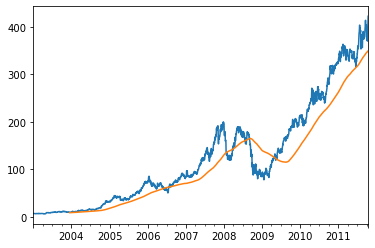

In [235]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

    Dönen ifade (250) davranış olarak groupby'ye benzer, ancak gruplamak yerine 250 günlük bir kayan pencerede gruplamayı mümkün kılan bir nesne yaratır. İşte burada, Apple'ın hisse senedi fiyatının 250 günlük hareketli pencere ortalamasına sahibiz. Varsayılan olarak, döndürme işlevleri, penceredeki tüm değerlerin NA dışı olmasını gerektirir. Bu davranış, eksik verileri ve özellikle zaman serisinin başlangıcında pencere döneminden daha az veriye sahip olacağınız gerçeğini hesaba katacak şekilde değiştirilebilir.

In [236]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [237]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

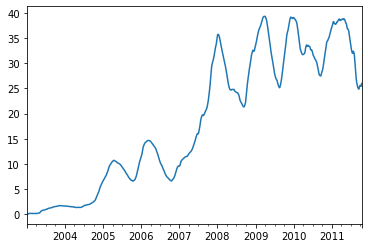

In [238]:
appl_std250.plot()

    Genişleyen pencere ortalamasını hesaplamak için, döndürme yerine genişletme operatörünü kullanın. Genişleyen ortalama, zaman penceresini zaman serisinin başlangıcından başlatır ve tüm seriyi kapsayana kadar pencerenin boyutunu artırır. Apple_std250 zaman serisindeki genişleyen pencere anlamı şuna benzer.

In [239]:
expanding_mean = appl_std250.expanding().mean()

    Bir DataFrame'de hareketli bir pencere fonksiyonunun çağrılması, dönüşümü her bir sütuna uygular.

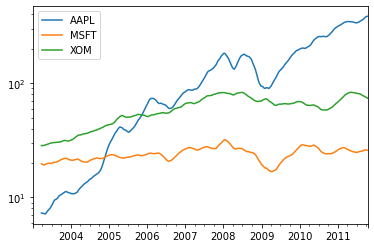

In [240]:
close_px.rolling(60).mean().plot(logy=True)

    Döndürme işlevi ayrıca belirli bir dönem sayısı yerine sabit boyutlu bir zaman farkını gösteren bir dizeyi de kabul eder. Bu gösterimi kullanmak, düzensiz zaman serileri için faydalı olabilir. Bunlar, yeniden örneklemek için geçebileceğiniz aynı dizelerdir. Örneğin, 20 günlük hareketli bir ortalamayı şu şekilde hesaplayabiliriz:

In [241]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


# Üstel Ağırlıklı Fonksiyonlar
    Eşit ağırlıklı gözlemlerle statik pencere boyutu kullanmanın bir alternatifi, daha yeni gözlemlere daha fazla ağırlık vermek için sabit bir bozulma faktörü belirlemektir. Bozunma faktörünü belirlemenin birkaç yolu vardır. Popüler olanı, sonucu açıklığa eşit pencere boyutuna sahip basit hareketli bir pencere işleviyle karşılaştırılabilir kılan bir aralık kullanmaktır.

    Üssel ağırlıklı bir istatistik, daha yeni gözlemlere daha fazla ağırlık verdiğinden, eşit ağırlıklı versiyona kıyasla değişikliklere daha hızlı "uyum sağlar".

    Pandas, yuvarlanma ve genişletme ile birlikte hareket edecek ewm operatörüne sahiptir. Aşağıda, Apple'ın hisse senedi fiyatının 60 günlük hareketli ortalamasını, span = 60 olan EW hareketli ortalama ile karşılaştıran bir örnek yer almaktadır.

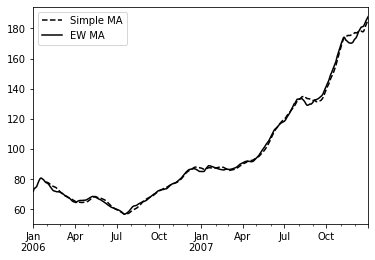

In [242]:
import matplotlib.pyplot as plt
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

# Binary Hareketli Pencere Fonksiyonları
    Korelasyon ve kovaryans gibi bazı istatistiksel operatörlerin iki zaman serisinde çalışması gerekir. Örnek olarak, finansal analistler genellikle bir hissenin S&P 500 gibi bir karşılaştırma endeksi ile ilişkisiyle ilgilenirler. Buna bir göz atmak için, önce tüm ilgi serilerimiz için yüzde değişimini hesaplıyoruz.

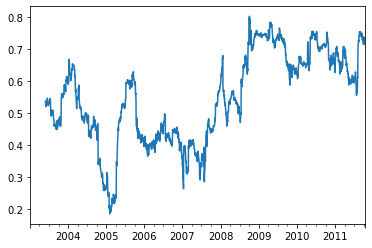

In [243]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

    S&P 500 endeksinin birçok hisse senedi ile korelasyonunu aynı anda hesaplamak istediğinizi varsayalım. Bir döngü yazmak ve yeni bir DataFrame oluşturmak kolay olabilir, ancak tekrarlanabilir, bu nedenle bir Series ve bir DataFrame geçirirseniz, rolling_corr gibi bir işlev DataFrame'deki her sütunla Serinin (bu durumda spx_rets) korelasyonunu hesaplayacaktır.

In [244]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

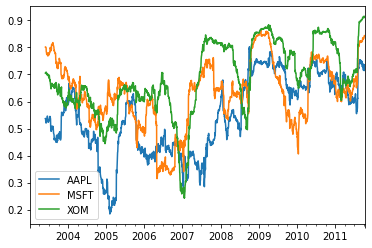

In [245]:
corr.plot()

# Kullanıcı Tanımlı Hareketli Pencere Fonksiyonları
    Döndürme ve ilgili yöntemler üzerinde uygulama yöntemi, hareketli bir pencere üzerinde kendi tasarladığınız bir dizi işlevini uygulamak için bir yol sağlar. Tek gereksinim, işlevin dizinin her bir parçasından tek bir değer (bir azalma) üretmesidir. Örneğin, yuvarlanan (...). Quan tile (q) kullanarak örnek nicelikleri hesaplayabilirken, belirli bir değerin örneklem üzerindeki yüzdelik sıralamasıyla ilgilenebiliriz. Scipy.stats.percentileofscore işlevi tam da bunu yapar.

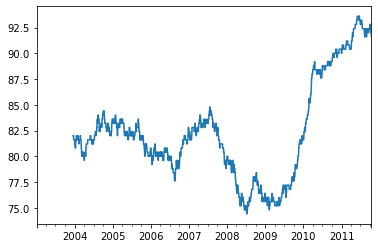

In [246]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()